In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

### a. Minimize risk analytically

Please visit the PDF report file.

### b. Monte Carlo

In [3]:
def gen_xy():
    x = np.random.uniform(-3, 3)
    y = np.random.uniform(2*x - 0.5, 2*x + 0.5)

    return x, y

In [4]:
def f_L(y, x, alpha):
    return np.square(y - alpha * x)

In [5]:
alpha = 2
M = 100_000

results = []

for _ in range(M):
    x, y = gen_xy()

    out = f_L(y, x, alpha)

    results.append(out)

print(f"Estimated risk: {np.mean(results).item():.4f}")

Estimated risk: 0.0830


### c. Plot approximation for R(1.5)

In [7]:
values_appro = []

alpha = 1.5

for m in range(2, 100):
    results = []

    for _ in range(m):
        x, y = gen_xy()

        out = f_L(y, x, alpha)

        results.append(out)

    values_appro.append({
        'm': m,
        'estimation': np.mean(results).item()
    })

In [9]:
df_appr = pd.DataFrame.from_records(values_appro)

df_appr.head()

,m,estimation
0,2,1.669239
1,3,0.825464
2,4,1.317081
3,5,0.357349
4,6,0.280911


In [16]:
true_R = 3 * np.square(alpha - 2) + 1/12

true_R

0.8333333333333334

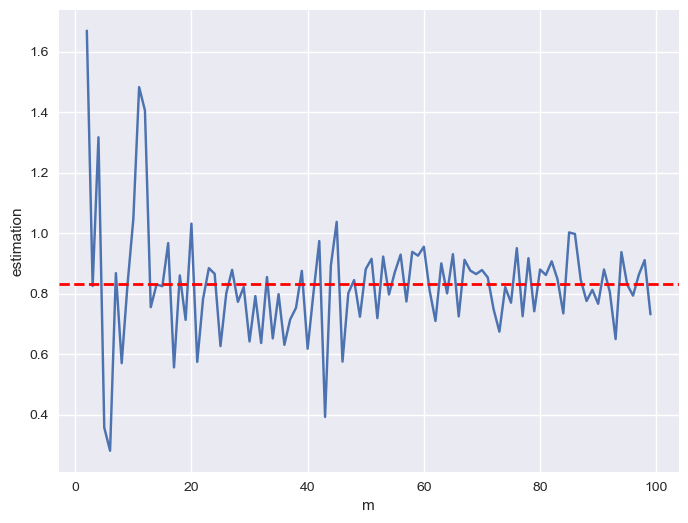

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.lineplot(df_appr, x='m', y='estimation', ax=ax)
ax.axhline(y=true_R, c='r', linewidth=2, linestyle='--')